<a href="https://colab.research.google.com/github/ikrawat-hotmail/AIMLPlayground/blob/main/tensorflow_tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is taken from
# https://www.youtube.com/watch?v=pAhPiF3yiXI&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [ ]:
# load some sample dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


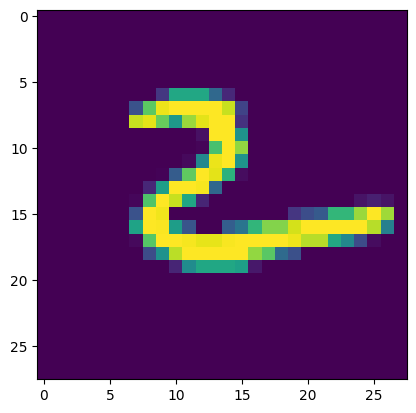

In [ ]:
print(type(x_train), type(y_train), type(x_test), type(y_test))
print(np.shape(x_train), np.shape(y_train), np.shape(x_test), np.shape(y_test))

plt.imshow(x_train[109, :])

In [ ]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
print(np.shape(x_train))

x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0
print(np.shape(x_test))

(60000, 784)
(10000, 784)


In [ ]:
# Sequential model
print(type(models), type(datasets), type(layers), type(models.Sequential))

# module is a file or package that contains python code
# 'type' is a object of type 'type'

<class 'module'> <class 'module'> <class 'module'> <class 'type'>


In [ ]:
# input layer 0, - 28 * 28
# inner layer 1, - 512 nodes
# inner layer 2, - 256 nodes
# o/p   layer 3, - 10 nodes, note that activation function is softmax, that is
# done in compile layer by setting from_logits
model = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10),
    ]
)

#
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9432 - loss: 0.1859
Epoch 2/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9751 - loss: 0.0790
Epoch 3/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9818 - loss: 0.0548
Epoch 4/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9871 - loss: 0.0405
Epoch 5/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9900 - loss: 0.0318


In [ ]:
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9815 - loss: 0.0695


[0.0694955363869667, 0.9815000295639038]